# 决策树与随机森林

## 决策树

- from sklearn import tree #导入需要的模块
- clf = tree.DecisionTreeClassifier() #实例化
- clf = clf.fit(X_train,y_train) #用训练集数据训练模型
- result = clf.score(X_test,y_test) #导入测试集，从接口中调用需要的信息Tsai Tsa

### 红酒数据集

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()
wine.data.shape
wine.target
#如果wine是一张表，应该长这样：
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.feature_names
wine.target_names
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
Xtrain.shape
Xtest.shape

(54, 13)

In [4]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score=clf.score(Xtest,Ytest)#返回预测的准确度
score

0.9629629629629629

In [10]:
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','稀释葡萄酒','脯氨酸']
import graphviz


In [11]:
len(feature_name)

13

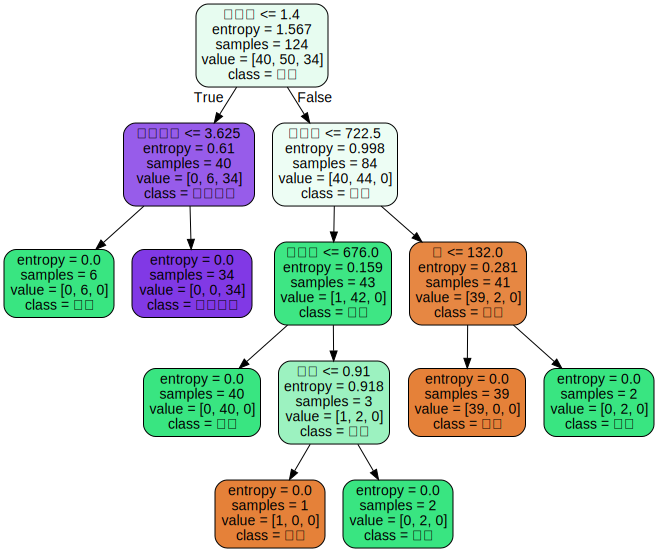

In [12]:
dot_data = tree.export_graphviz(clf
            ,out_file = None
            ,feature_names= feature_name
            ,class_names=["琴酒","雪莉","贝尔摩德"]
            ,filled=True
            ,rounded=True)
graph = graphviz.Source(dot_data)
graph

### 交叉验证

In [ ]:
# 回归模型的交叉验证
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor
                ,boston.data
                ,boston.target
                ,cv=10
                ,scoring = "neg_mean_squared_error")

## 随机森林

### 随机森林与决策树对比

In [18]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
wine = load_wine()
wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
# 建模的基本流程
from sklearn.model_selection import train_test_split
xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(xtrain,Ytrain)
rfc = rfc.fit(xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

single Tree:0.9444444444444444 Random Forest:1.0


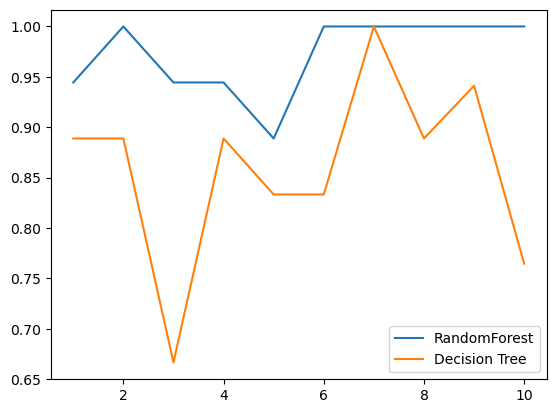

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

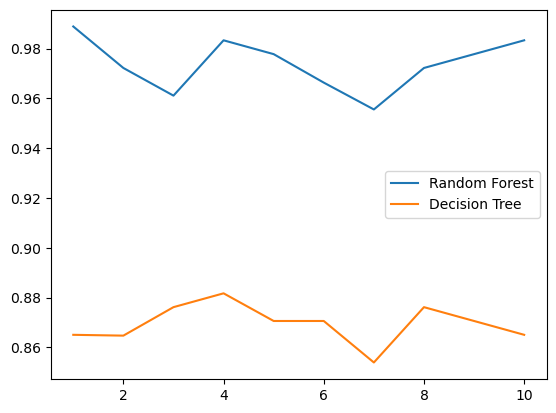

In [25]:
rfc_1 = []
clf_1 = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10) .mean()
    clf_1.append(clf_s)
plt.plot(range(1,11),rfc_1,label ="Random Forest")
plt.plot(range(1,11),clf_1,label = "Decision Tree")
plt.legend()
plt.show()

### 随机森林填补缺失值


In [79]:
import pandas as pd
import numpy as np
excel_file = 'merged_bio_train.xlsx'
df = pd.read_excel(excel_file,)
X_missing= df.drop(['next_酸钠','next_残糖'], axis=1)
columns_to_keep = ['next_酸钠','next_残糖']
Y_missing = df[columns_to_keep]

In [ ]:
# #使用均值进行填补
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# X_missing_mean = imp_mean.fit_transform(X_missing)
# #使用0进行填补
# imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
# X_missing_0 = imp_0.fit_transform(X_missing)
# X_missing_mean=pd.DataFrame(X_missing_mean)
# X_missing_mean.isnull().sum()

In [75]:
X_missing.isnull().sum()

发酵周期/h        0
酶活            1
酸钠            4
残糖g/dl        1
菌浓ml/50ml    11
菌浓g/50ml     10
PH值           2
罐压            2
风量L/h         2
转速r/min       2
溶氧           21
温度            2
碱重kg          7
重量KG          6
dtype: int64

In [81]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values


In [85]:
X_missing_reg.isnull().sum(axis=0)

发酵周期/h        0
酶活            1
酸钠            4
残糖g/dl        1
菌浓ml/50ml    11
菌浓g/50ml     10
PH值           2
罐压            2
风量L/h         2
转速r/min       2
溶氧           21
温度            2
碱重kg          7
重量KG          6
dtype: int64

In [82]:
sortindex

array([ 0,  1,  3,  6,  7,  8,  9, 11,  2, 13, 12,  5,  4, 10])

In [88]:
from sklearn.ensemble import RandomForestRegressor
for i in sortindex:
#构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
#在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
    strategy='constant',fill_value=0).fit_transform(df)
#找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(xtrain, Ytrain)
    Ypredict = rfc.predict(xtest)
#将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i] .isnull() ,i] = Ypredict

NameError: name 'y_full' is not defined